In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_2_plotting.ipynb")

## Lab 2: Plotting data

Read in the wrist force data and plot it for each of the x, y, and z channels. I recommend doing this in the following order:

- Copy in your lecture activity code and do that plot first - make sure it's working and the titles/labels etc are correct 
- Once that's working, add a **for** loop to loop over x, y, z
- If doing a **for** loop is confusing, then start with just copying the code over, once, and changing the dimension you're using in the copy. Then go back and put the for loop in

[optional] Do nicer colors than the default ones.

For setting the colors and the data labels, you can either do it by hand, or setup a list of color names and use that

In [2]:
# Libraries that we need to import - numpy and json (for loading the description file)
import numpy as np
import json as json
import matplotlib.pyplot as plt

In [3]:
# Note: your repository is set up to have a copy of the Data files in this folder as well as the Week_1_arrays
#. folder - this is so the autograder works correctly.  
data_from_csv = np.loadtxt("Data/proxy_pick_data.csv", dtype="float", delimiter=",")
pick_data = data_from_csv
# Load in the proxy_pick_data_description.json file
try:
    with open("Data/proxy_data_description.json", "r") as fp:
        pick_data_description = json.load(fp)
except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")

Text(0.5, 1.0, 'Wrist torque')

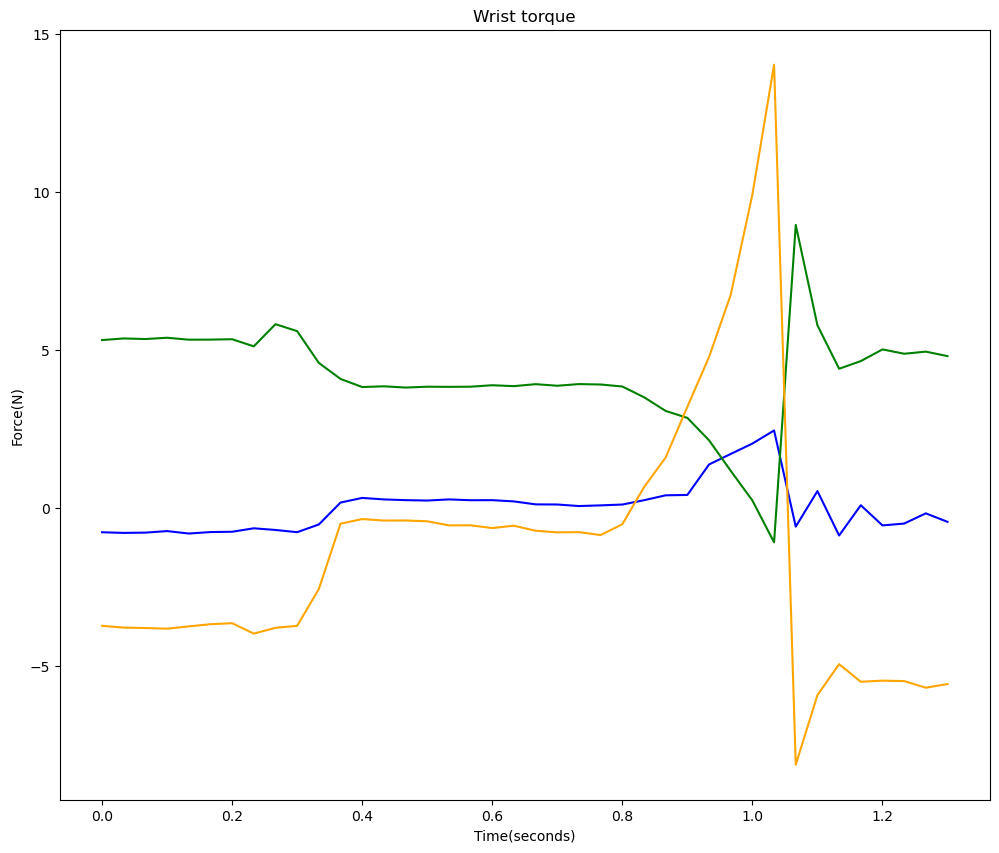

In [4]:
data_channels = pick_data_description["Data channels"]
n_total_dims = sum(item["dimensions"] for item in data_channels)
column = pick_data.shape[1]

n_time_steps = column // n_total_dims

pick_data_description["n_total_dims"] = n_total_dims
pick_data_description["n_time_steps"] = n_time_steps

n_rows = 1
n_cols = 1
time_step = 1/30  
n_time_steps = 40
ts = np.arange(0, n_time_steps * time_step, time_step)
ys = np.zeros([3, n_time_steps])
fig, axs = plt.subplots(n_rows, n_cols , figsize = (12 , 10))

for a in range(n_rows):
    pick_successful_yn = pick_data[a,-1]
    for b in range(n_cols):
        channel_info = pick_data_description["Data channels"][b]   
        for xyz_dim in range(3):
            start_index = (channel_info["index_offset"]+xyz_dim)
            ys[xyz_dim,:] = pick_data[a,start_index:-1:n_total_dims]

axs.plot(ts, ys[0,:], label="x", color='blue')
axs.plot(ts, ys[1,:], label="y", color='green')
axs.plot(ts, ys[2,:], label="z", color='orange')
axs.set_xlabel("Time(seconds)")
axs.set_ylabel("Force(N)")
axs.set_title("Wrist torque")

In [5]:
grader.check("plot_force")

plot_force results: All test cases passed!

## Part 2 - plot both the wrist force and the wrist torque in the same figure
Force on the left, Torque on the right. Don't forget labels and titles.

You can do this one of two ways; note that in the hwk you'll need to do the 2nd option (with some help), but if you want to try it now, feel free.
- Option 1: Copy and paste the code from above (twice) and change the relevant data/lines of code (axs[], names/titles, start index) in the second copy
- Option 2: Encapsulate the plotting part in a function then call that function twice
  - pass in the axes to plot in, along with t values (or create them within the function)
  - do the x,y,z loop inside of the plot

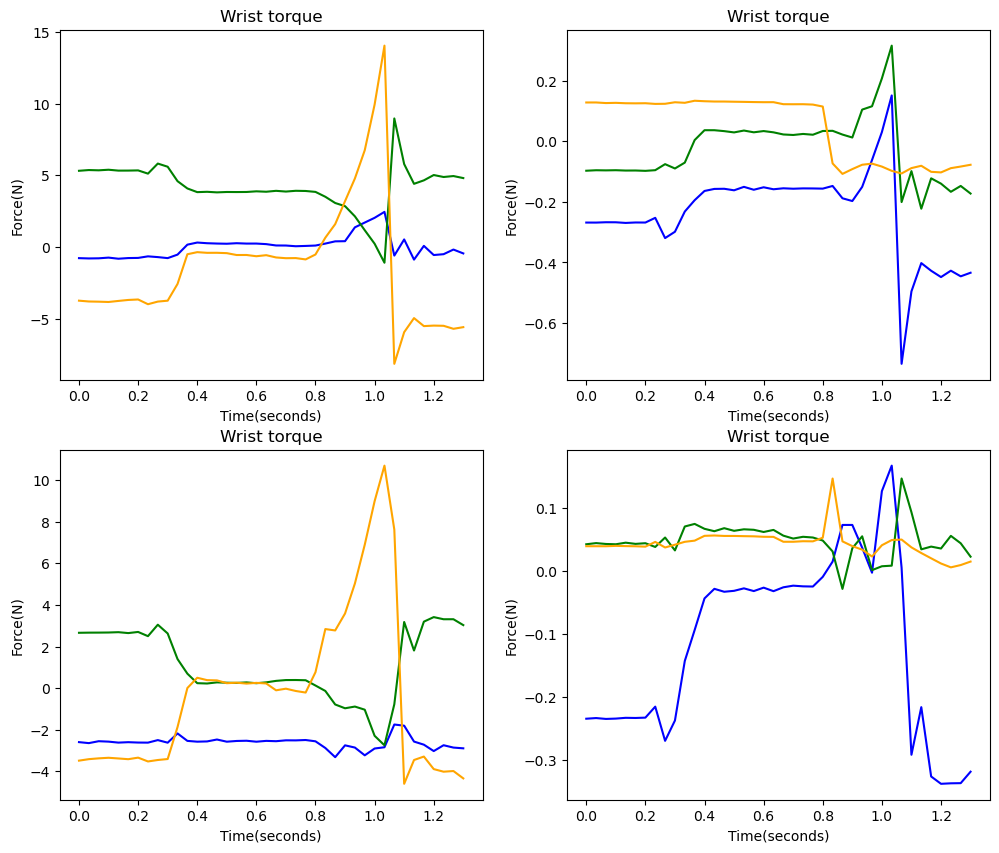

In [6]:
def plot_channel_row(axs, ts, ys, channel_info, which_row, pick_successful_yn):
    axs.plot(ts, ys[0,:], label="x", color='blue')
    axs.plot(ts, ys[1,:], label="y", color='green')
    axs.plot(ts, ys[2,:], label="z", color='orange')
    axs.set_xlabel("Time(seconds)")
    axs.set_ylabel("Force(N)")
    axs.set_title("Wrist torque")

n_rows = 2
n_cols = 2
time_step = 1/30  
n_time_steps = 40
ts = np.arange(0, n_time_steps * time_step, time_step)
ys = np.zeros([3, n_time_steps])
fig, axs = plt.subplots(n_rows, n_cols , figsize = (12 , 10))

for a in range(n_rows):
    pick_successful_yn = pick_data[a,-1]
    for b in range(n_cols):
        channel_info = pick_data_description["Data channels"][b]   
        for xyz_dim in range(3):
            start_index = (channel_info["index_offset"]+xyz_dim)
            ys[xyz_dim,:] = pick_data[a,start_index:-1:n_total_dims]
        plot_channel_row(axs[a, b], ts, ys, channel_info, a, pick_successful_yn )

    

In [7]:
grader.check("plot_force_and_torque")

plot_force_and_torque results:
    plot_force_and_torque - 1 result:
        ❌ Test case failed
        Trying:
            assert axs.size == 2
        Expecting nothing
        **********************************************************************
        Line 1, in plot_force_and_torque 0
        Failed example:
            assert axs.size == 2
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest plot_force_and_torque 0[0]>", line 1, in <module>
                assert axs.size == 2
                       ^^^^^^^^^^^^^
            AssertionError

    plot_force_and_torque - 2 result:
        ❌ Test case failed
        Trying:
            assert axs[0].get_title() == 'Wrist force'
        Expecting nothing
        **********************************************************************
        Line 1, in plot_force_and_torque 1
        Failed example:
            assert axs[0].get_title() == 'Wrist force'
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest plot_force_and_torque 1[0]>", line 1, in <module>
                assert axs[0].get_title() == 'Wrist force'
                       ^^^^^^^^^^^^^^^^
            AttributeError: 'numpy.ndarray' object has no attribute 'get_title'

    plot_force_and_torque - 3 result:
        ❌ Test case failed
        Trying:
            assert axs[1].get_title() == 'Wrist torque'
        Expecting nothing
        **********************************************************************
        Line 1, in plot_force_and_torque 2
        Failed example:
            assert axs[1].get_title() == 'Wrist torque'
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest plot_force_and_torque 2[0]>", line 1, in <module>
                assert axs[1].get_title() == 'Wrist torque'
                       ^^^^^^^^^^^^^^^^
            AttributeError: 'numpy.ndarray' object has no attribute 'get_title'

    plot_force_and_torque - 4 result:
        ❌ Test case failed
        Trying:
            assert len(axs[0].lines) == 3
        Expecting nothing
        **********************************************************************
        Line 1, in plot_force_and_torque 3
        Failed example:
            assert len(axs[0].lines) == 3
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest plot_force_and_torque 3[0]>", line 1, in <module>
                assert len(axs[0].lines) == 3
                           ^^^^^^^^^^^^
            AttributeError: 'numpy.ndarray' object has no attribute 'lines'

    plot_force_and_torque - 5 result:
        ❌ Test case failed
        Trying:
            assert len(axs[1].lines) == 3
        Expecting nothing
        **********************************************************************
        Line 1, in plot_force_and_torque 4
        Failed example:
            assert len(axs[1].lines) == 3
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest plot_force_and_torque 4[0]>", line 1, in <module>
                assert len(axs[1].lines) == 3
                           ^^^^^^^^^^^^
            AttributeError: 'numpy.n

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [8]:

# List of names (creates a set)
worked_with_names = {}
# List of URLS (creates a set)
websites = {}
# Approximate number of hours, including lab/in-class time
hours = 10
your_column_for_wrist_torque = any
# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")
for r in range(len(pick_data)):
    for c in range(len(pick_data[0])):
        if c == your_column_for_wrist_torque:
            # Assuming 'your_column_for_wrist_torque' is the column index you are interested in
            print(f"Row: {r}, Column: {c // n_time_steps}, Successful y/n: {pick_data[r, -1] == 1}, Value: {pick_data[r][c]}")

In [9]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit just the .ipynb file to Gradescope, Lab 2 plotting (we will provide the data files). Don't change the provided variable names or autograding will fail. Make sure your plots are visible!

In [10]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

ExportFailedException: There was an error generating your LaTeX; showing full error message:
    This is BibTeX, Version 0.99d (MiKTeX 23.10)
    The top-level auxiliary file: notebook.aux
    I found no \citation commands---while reading file notebook.aux
    I found no \bibdata command---while reading file notebook.aux
    I found no \bibstyle command---while reading file notebook.aux
    (There were 3 error messages)
